## Import library

In [3]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler
import tensorflow as tf
from keras.utils import to_categorical 
from keras.layers import Dense, Layer
from keras.models import Model, Sequential

## Dataset
Dataset used here can be downloaded from https://www.kaggle.com/datasets/sujithmandala/obesity-classification-dataset

### Open and Extract zip file

In [4]:
with zipfile.ZipFile("data.zip", 'r') as f:
    zipfile.ZipFile.extractall(f)

### Read and Print sample of dataset
The dataset used for the training here is the classification of obesity

In [5]:
dataframe = pd.read_csv("Obesity Classification.csv")
dataframe.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


**WHO Classification of Weight Status**

- underweight < 18.5
- normal 18.5 - 24.9
- overweight 25 - 29.9
- obese type I 30 - 34.9
- obese type II 35 - 39.9
- obese type III >= 40

In [6]:
# change column name
new_column_names = {
    'Age':'Umur',
    'Gender':'Jenis Kelamin',
    'Height':'Tinggi Badan',
    'Weight':'Berat Badan'
}

dataframe.rename(columns=new_column_names, inplace=True)

# change value
dataframe['Jenis Kelamin'].replace({'Female':'Perempuan', 'Male':'Laki-Laki'}, inplace=True)

### Change label
for better understanding when deployed to mobile app, change the language into bahasa.

In [7]:
def change_label(row):
    if row['BMI'] < 18.5:
        return 'Kekurangan Berat Badan'
    elif 18.5 <= row['BMI'] <= 24.9:
        return 'Normal'
    elif 25 <= row['BMI'] <= 29.9:
        return 'Kelebihan Berat Badan'
    elif 30 <= row['BMI'] <= 34.9:
        return 'Obesitas Tipe I'
    elif 35 <= row['BMI'] <= 39.9:
        return 'Obesitas Tipe II'
    else:
        return 'Obesitas Tipe III'
    
dataframe['BMI'] = dataframe['Berat Badan']/((dataframe['Tinggi Badan']/100)**2)
dataframe['Label'] = dataframe.apply(change_label, axis=1)

## Split the dataset
use train_test_split function to split the dataset.

### Dataset limitations
Due to the limitations of the small dataset, the data was only divided into train and test, and to overcome label imbalance, the data augmentation oversampling technique was applied to the split dataset.

In [8]:
X = dataframe[['BMI']]
y = dataframe['Label']

# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply RandomOverSampler after train-test split
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Min-max scale the features
mm_scaler = MinMaxScaler()
X_train_resampled = mm_scaler.fit_transform(X_train_resampled)
X_test = mm_scaler.transform(X_test)

# Convert to NumPy arrays
X_train_resampled = np.array(X_train_resampled)
X_test = np.array(X_test)

# Label encode the target variable
le_target = LabelEncoder()
y_train_resampled = le_target.fit_transform(y_train_resampled)
y_test = le_target.transform(y_test)

# One-hot encode the target variable
y_train_resampled = to_categorical(y_train_resampled)
y_test = to_categorical(y_test)


## Model Architecture
Model architecture use relu for input layer and softmax four output layer, and 6 unit because there are 6 weight status in the dataset.

In [9]:
# Add layers to the model
model = Sequential()

model.add(Dense(10, input_shape=(1,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(6, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_resampled, y_train_resampled, epochs=500)



Epoch 1/500


6/6 [==============================] - 1s 3ms/step - loss: 1.7743 - accuracy: 0.1488
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 1.7676 - accuracy: 0.1726
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 1.7620 - accuracy: 0.2024
Epoch 4/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7562 - accuracy: 0.2083
Epoch 5/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7499 - accuracy: 0.2262
Epoch 6/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7445 - accuracy: 0.2321
Epoch 7/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7386 - accuracy: 0.2381
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7327 - accuracy: 0.2381
Epoch 9/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7265 - accuracy: 0.2381
Epoch 10/500
6/6 [==============================] - 0s 3ms/step - loss: 1.7194 - accuracy: 0.2440
Epoch 11/500
6/6 [=======

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                20        
                                                                 
 dense_1 (Dense)             (None, 32)                352       
                                                                 
 dense_2 (Dense)             (None, 6)                 198       
                                                                 
Total params: 570 (2.23 KB)
Trainable params: 570 (2.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [11]:
model.save('Klasifikasi_Obesitas.h5')

C:\ml-deploy\venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Accuracy and Loss
after training, evaluate the model using test dataset.

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss\t:', loss)
print('acc\t:', accuracy)

2/2 [==============================] - 0s 5ms/step - loss: 0.3335 - accuracy: 0.9394
Loss	: 0.3334882855415344
acc	: 0.939393937587738


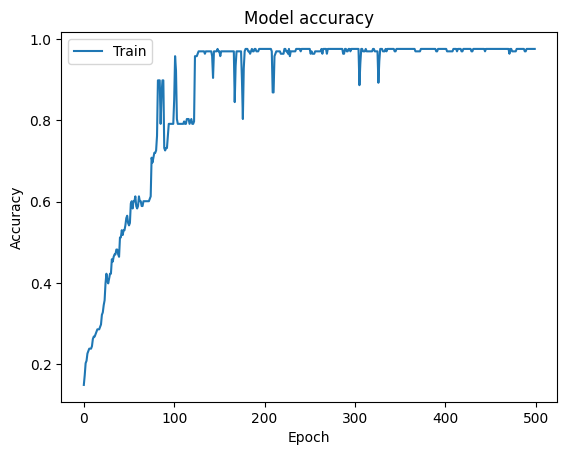

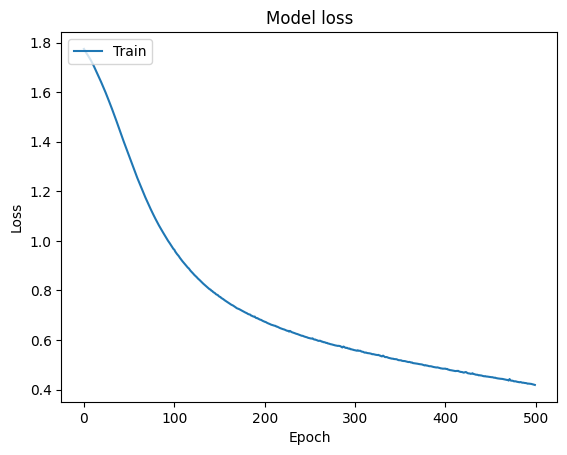

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

## Model Testing
Now we can test and use the model for predict the weight status of the user.

In [14]:
import numpy as np

def preprocess_input(Tinggi, Berat):
    # Calculate BMI
    bmi = Berat / ((Tinggi / 100) ** 2)

    # Normalize input features
    input_data = mm_scaler.transform([[bmi]])

    return np.array(input_data)

def make_prediction(model, input_data):
    # Make prediction
    prediction = model.predict(input_data)

    # If your model output is one-hot encoded, convert it to a numerical label
    predicted_label = np.argmax(prediction)

    # Convert numerical label back to original label
    predicted_label_original = le_target.inverse_transform([predicted_label])[0]

    return predicted_label_original

# Example usage:
Tinggi = 175
Berat = 100

input_data = preprocess_input(Tinggi, Berat)
prediction_result = make_prediction(model, input_data)

print(f"The predicted label is: {prediction_result}")


1/1 [==============================] - 0s 74ms/step
The predicted label is: Obesitas Tipe I


C:\ml-deploy\venv\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
